# Libor Curve Building Choice of Interpolation Scheme

In [46]:
# This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; 
# without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  
# See the license for more details.

We examine the impact of the choice of the interpolation scheme

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
from financepy.finutils.FinDate import FinDate
from financepy.finutils.FinDayCount import FinDayCountTypes
from financepy.finutils.FinFrequency import FinFrequencyTypes
from financepy.finutils.FinCalendar import *
from financepy.market.curves.FinLiborCurve import FinLiborCurve
from financepy.products.libor.FinLiborFRA import FinLiborFRA
from financepy.products.libor.FinLiborDeposit import FinLiborDeposit
from financepy.products.libor.FinLiborSwap import FinLiborSwap
from financepy.products.libor.FinLiborFuture import FinLiborFuture
from financepy.market.curves.FinInterpolate import FinInterpMethods

We start by defining this useful function

In [48]:
def plotCurve(tmax):
    times = np.linspace(0.0, tmax, 500)
    zeroRates = liborCurve.zeroRate(times)
    fwdRates = liborCurve.fwd(times)

    plt.figure(figsize=(8,6))
    plt.plot(times, zeroRates*100, label="zero rates")
    plt.plot(times, fwdRates*100, label = "fwd rates")
    plt.xlabel("Times")
    plt.ylabel("Rates (%) - See Legend")
    plt.legend();

## Deposits Only

We use deposits only for simplicity

### Piecewise Flat Interpolation

In [49]:
spotDate = FinDate(6, 6, 2018)

In [50]:
spotDays = 0
settlementDate = spotDate.addWorkDays(spotDays)
depoDCCType = FinDayCountTypes.ACT_360

In [51]:
depos = []
depo = FinLiborDeposit(settlementDate, "1M", 0.0230, depoDCCType); depos.append(depo)
depo = FinLiborDeposit(settlementDate, "2M", 0.0235, depoDCCType); depos.append(depo)
depo = FinLiborDeposit(settlementDate, "3M", 0.0240, depoDCCType); depos.append(depo)
depo = FinLiborDeposit(settlementDate, "6M", 0.0220, depoDCCType); depos.append(depo)

liborCurve = FinLiborCurve("USD_LIBOR", settlementDate, depos, [], [])

In [52]:
liborCurve.print()

TIMES,DISCOUNT FACTORS
 0.0000000, 1.0000000
 0.0821373, 0.9980870
 0.1670126, 0.9960338
 0.2518878, 0.9939041
 0.5010377, 0.9889404


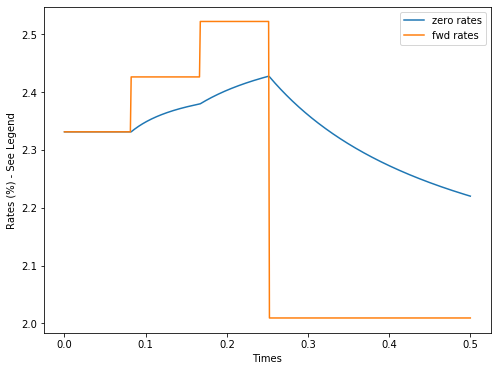

In [53]:
plotCurve(0.5)

The shape of the forwards is an artifact of the piecewise flat interpolation scheme and the fact that Actual 360 deposit rates do not compare directly to zero rates or continuously compounded forwards.

### Piecewise Linear Forwards Interpolation

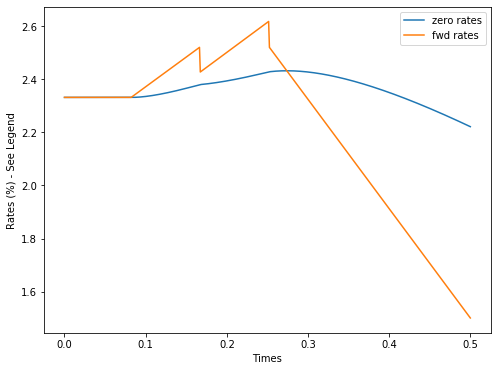

In [54]:
interpMethod = FinInterpMethods.LINEAR_FORWARDS

depos = []
depo = FinLiborDeposit(settlementDate, "1M", 0.0230, depoDCCType); depos.append(depo)
depo = FinLiborDeposit(settlementDate, "2M", 0.0235, depoDCCType); depos.append(depo)
depo = FinLiborDeposit(settlementDate, "3M", 0.0240, depoDCCType); depos.append(depo)
depo = FinLiborDeposit(settlementDate, "6M", 0.0220, depoDCCType); depos.append(depo)

liborCurve = FinLiborCurve("USD_LIBOR", settlementDate, depos, [], [], interpMethod)

plotCurve(0.5)

### Piecewise Linear Zero Rates

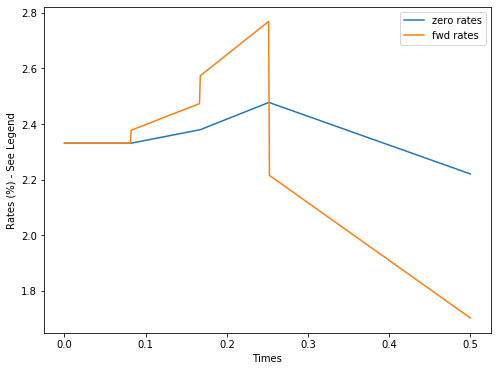

In [55]:
interpMethod = FinInterpMethods.LINEAR_ZERO_RATES

depos = []
depo = FinLiborDeposit(settlementDate, "1M", 0.0230, depoDCCType); depos.append(depo)
depo = FinLiborDeposit(settlementDate, "2M", 0.0235, depoDCCType); depos.append(depo)
depo = FinLiborDeposit(settlementDate, "3M", 0.0245, depoDCCType); depos.append(depo)
depo = FinLiborDeposit(settlementDate, "6M", 0.0220, depoDCCType); depos.append(depo)

liborCurve = FinLiborCurve("USD_LIBOR", settlementDate, depos, [], [], interpMethod)

plotCurve(0.5)

## Futures Only

Now we build a curve using just Futures contracts.

In [56]:
spotDays = 2
settlementDate = spotDate.addWorkDays(spotDays)

In [57]:
futs = []
fut = FinLiborFuture(spotDate, 1) ; futs.append(fut)
fut = FinLiborFuture(spotDate, 2) ; futs.append(fut)
fut = FinLiborFuture(spotDate, 3) ; futs.append(fut)
fut = FinLiborFuture(spotDate, 4) ; futs.append(fut)
fut = FinLiborFuture(spotDate, 5) ; futs.append(fut)
fut = FinLiborFuture(spotDate, 6) ; futs.append(fut)

Given a futures price and a convexity adjustent, we can convert these to FRAs

In [58]:
fras = [None]*len(futs)
fras[0] = futs[0].toFRA(97.6675,-0.00005)
fras[1] = futs[1].toFRA(97.5200,-0.00060)
fras[2] = futs[2].toFRA(97.3550,-0.00146)
fras[3] = futs[3].toFRA(97.2450,-0.00263)
fras[4] = futs[4].toFRA(97.1450,-0.00411)
fras[5] = futs[5].toFRA(97.0750,-0.00589)

In [59]:
liborCurve = FinLiborCurve("USD_LIBOR", settlementDate, [], fras, [])

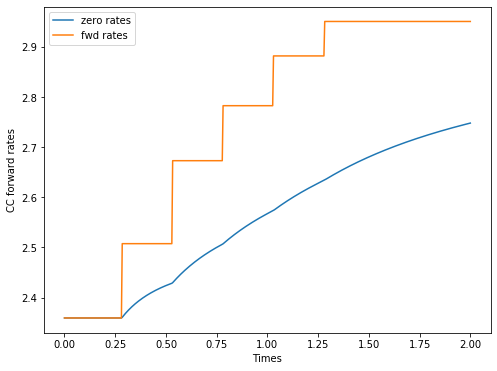

In [60]:
times = np.linspace(0.0,2.0,500)
zeroRates = liborCurve.zeroRate(times)
fwdRates = liborCurve.fwd(times)

plt.figure(figsize=(8,6))
plt.plot(times, zeroRates*100, label="zero rates")
plt.plot(times, fwdRates*100, label = "fwd rates")
plt.xlabel("Times")
plt.ylabel("CC forward rates")
plt.legend();

We see that the forward rates are piecewise flat and increasing.

Copyright (c) 2020 Dominic O'Kane